<a href="https://colab.research.google.com/github/SAMYSOSERIOUS/Stats-analytics/blob/main/GroupExercice2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data :Letter Recognition**
Source:https://archive.ics.uci.edu/dataset/59/letter+recognition

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

letter_recognition = fetch_ucirepo(id=59)

X = letter_recognition.data.features
y = letter_recognition.data.targets


X.head()



,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
y.head()

,lettr
0,T
1,I
2,D
3,N
4,G


# **Feedforward Neural Network (FFNN)**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2816 - loss: 2.5250 - val_accuracy: 0.7009 - val_loss: 1.1007
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6384 - loss: 1.1632 - val_accuracy: 0.7609 - val_loss: 0.8276
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6989 - loss: 0.9534 - val_accuracy: 0.8022 - val_loss: 0.6892
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7415 - loss: 0.8215 - val_accuracy: 0.8272 - val_loss: 0.5972
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7735 - loss: 0.7232 - val_accuracy: 0.8450 - val_loss: 0.5341
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7896 - loss: 0.6725 - val_accuracy: 0.8594 - val_loss: 0.4860
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8023 - loss: 0.6200 - val_accuracy: 0.8691 - val_loss: 0.4428
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8106 - loss: 0.5891 - val_accuracy: 0

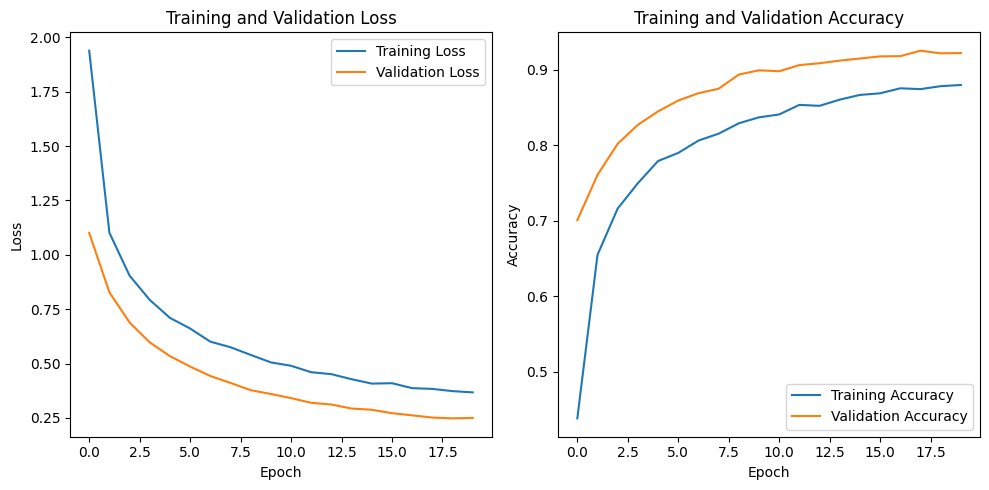

In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


le = LabelEncoder()
y_encoded = le.fit_transform(y['lettr'])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')  ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Convolutional Neural Network**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3621 - loss: 2.3353 - val_accuracy: 0.6994 - val_loss: 1.0918
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7112 - loss: 0.9896 - val_accuracy: 0.7472 - val_loss: 0.8566
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7790 - loss: 0.7672 - val_accuracy: 0.7878 - val_loss: 0.7310
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.6639 - val_accuracy: 0.8163 - val_loss: 0.6344
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8295 - loss: 0.5742 - val_accuracy: 0.8281 - val_loss: 0.5851
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8549 - loss: 0.5065 - val_accuracy: 0.8475 - val_loss: 0.5231
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8637 - loss: 0.4692 - val_accuracy: 0.8616 - val_loss: 0.4773
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.4191 - val_accuracy: 0.8666 - val_

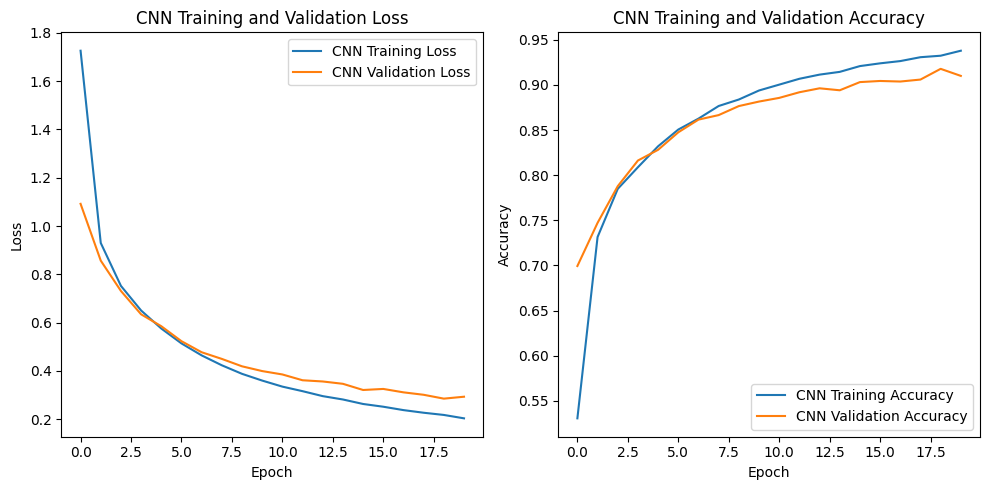

In [10]:
X_train_reshaped = X_train_scaled.reshape(-1, 16, 1, 1)
X_test_reshaped = X_test_scaled.reshape(-1, 16, 1, 1)

# CNN Model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(16, 1, 1)),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f"CNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")

y_pred_cnn = np.argmax(cnn_model.predict(X_test_reshaped), axis=1)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print("CNN Accuracy:", accuracy_cnn)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Recurrent Neural Network (RNN)**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2668 - loss: 2.6567 - val_accuracy: 0.6388 - val_loss: 1.4068
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6768 - loss: 1.2408 - val_accuracy: 0.7356 - val_loss: 1.0015
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7557 - loss: 0.9147 - val_accuracy: 0.7725 - val_loss: 0.8371
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7839 - loss: 0.7826 - val_accuracy: 0.8025 - val_loss: 0.7326
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8117 - loss: 0.6707 - val_accuracy: 0.8166 - val_loss: 0.6606
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.6114 - val_accuracy: 0.8309 - val_loss: 0.6035
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.5708 - val_accuracy: 0.8391 - val_loss: 0.5627
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8506 - loss: 0.5265 - val_accuracy: 0.8494 - val_

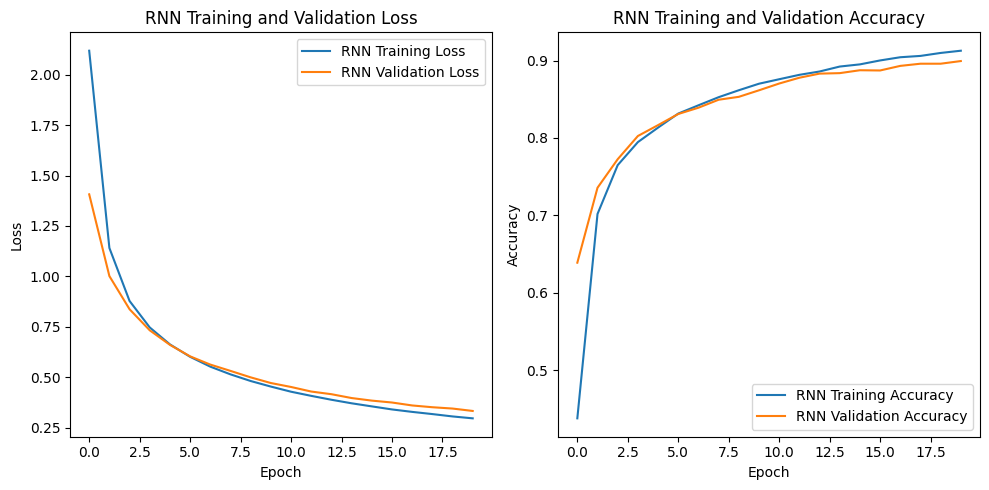

In [13]:

X_train_reshaped_rnn = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_reshaped_rnn = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

# RNN Model
rnn_model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped_rnn.shape[1], X_train_reshaped_rnn.shape[2])),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

rnn_history = rnn_model.fit(X_train_reshaped_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = rnn_model.evaluate(X_test_reshaped_rnn, y_test)
print(f"RNN Test Loss: {loss:.4f}")
print(f"RNN Test Accuracy: {accuracy:.4f}")

y_pred_rnn = np.argmax(rnn_model.predict(X_test_reshaped_rnn), axis=1)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("RNN Accuracy:", accuracy_rnn)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Long Short-Term Memory (LSTM)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1341 - loss: 2.9731 - val_accuracy: 0.3653 - val_loss: 2.2004
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4184 - loss: 2.0276 - val_accuracy: 0.5350 - val_loss: 1.6533
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5506 - loss: 1.5593 - val_accuracy: 0.6081 - val_loss: 1.3745
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6276 - loss: 1.3029 - val_accuracy: 0.6388 - val_loss: 1.2069
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6881 - loss: 1.0949 - val_accuracy: 0.6881 - val_loss: 1.0626
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7203 - loss: 0.9560 - val_accuracy: 0.7134 - val_loss: 0.9627
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7487 - loss: 0.8639 - val_accuracy: 0.7556 - val_loss: 0.8595
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7793 - loss: 0.7635 - val_accuracy: 0.7700 - 

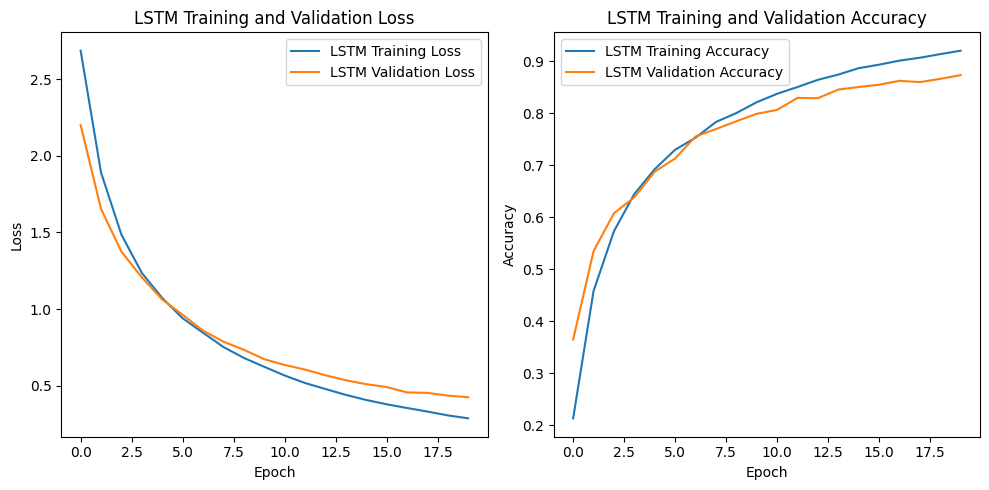

In [12]:
# LSTM Model
lstm_model = keras.Sequential([
    layers.LSTM(64, input_shape=(16, 1)),  # LSTM layer
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

lstm_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

lstm_history = lstm_model.fit(X_train_reshaped_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, accuracy = lstm_model.evaluate(X_test_reshaped_rnn, y_test)
print(f"LSTM Test Loss: {loss:.4f}")
print(f"LSTM Test Accuracy: {accuracy:.4f}")

y_pred_lstm = np.argmax(lstm_model.predict(X_test_reshaped_rnn), axis=1)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **comparison**

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision_ffnn = precision_score(y_test, y_pred, average='weighted')
recall_ffnn = recall_score(y_test, y_pred, average='weighted')
f1_ffnn = f1_score(y_test, y_pred, average='weighted')

precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')

precision_rnn = precision_score(y_test, y_pred_rnn, average='weighted')
recall_rnn = recall_score(y_test, y_pred_rnn, average='weighted')
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')

precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')


# Create a DataFrame for comparison
data = {
    'Model': ['FFNN', 'CNN', 'RNN', 'LSTM'],
    'Accuracy': [accuracy, accuracy_cnn, accuracy_rnn, accuracy_lstm],
    'Precision': [precision_ffnn, precision_cnn, precision_rnn, precision_lstm],
    'Recall': [recall_ffnn, recall_cnn, recall_rnn, recall_lstm],
    'F1-Score': [f1_ffnn, f1_cnn, f1_rnn, f1_lstm]
}

comparison_df = pd.DataFrame(data)
comparison_df

,Model,Accuracy,Precision,Recall,F1-Score
0,FFNN,0.89925,0.930516,0.92825,0.928341
1,CNN,0.91275,0.914026,0.91275,0.912744
2,RNN,0.89925,0.901233,0.89925,0.899338
3,LSTM,0.88250,0.884819,0.88250,0.882724


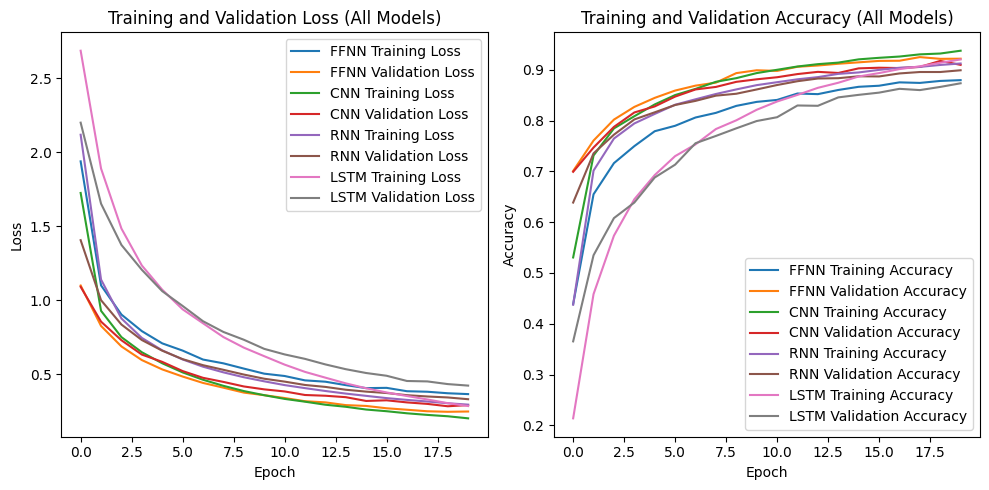

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='FFNN Training Loss')
plt.plot(history.history['val_loss'], label='FFNN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (All Models)')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='FFNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='FFNN Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (All Models)')
plt.legend()

plt.tight_layout()
plt.show()